<a href="https://colab.research.google.com/github/mohamad-azrin/ADALL_github/blob/main/8102630A_ADALL_Practical_Test_Vehicle_Sales_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ADALL Practical Test – Regression (Vehicle Sales)

**Dataset:** `syedanwarafridi/vehicle-sales-data` → `car_prices.csv`  
**Goal:** Build a regression model to predict **selling price** using basic vehicle attributes.

## Guide for this practical test
- Focus on a **clear workflow**
- Keep code **readable** and **stable**.
- Answer short questions in **markdown** cells.
- You may run cells step-by-step and check outputs.

##Data Dictionary

sellingprice:
The price at which the vehicle was sold.

year: The manufacturing year of the vehicle.

make:
The brand or manufacturer of the vehicle.

model:
The specific model of the vehicle.

body:
The body type of the vehicle (e.g., SUV, Sedan).

transmission:
The type of transmission in the vehicle (e.g., automatic).

odometer:
The mileage or distance traveled by the vehicle.

condition:
Condition of the vehicle, rated on a scale.



## Section 0) Setup

This notebook uses **kagglehub** to download the dataset directly into Colab.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Section 1) Download and load the dataset.
###Run the following code exactly as shown for Section 1. Do not edit it, or your results and answers may differ from the expected output.

In [2]:
import kagglehub
path = kagglehub.dataset_download("syedanwarafridi/vehicle-sales-data")
print("Downloaded to:", path)
print("Files:", os.listdir(path))
csv_path = os.path.join(path, "car_prices.csv")
df = pd.read_csv(csv_path)

100%|██████████| 18.8M/18.8M [00:00<00:00, 44.2MB/s]

Extracting files...


Downloaded to: /root/.cache/kagglehub/datasets/syedanwarafridi/vehicle-sales-data/versions/1
Files: ['car_prices.csv']


In [3]:
target_col = "sellingprice"
feature_cols = [
    "year",
    "make",
    "model",
    "body",
    "transmission",
    "odometer",
    "condition",
]
df = df[feature_cols + [target_col]].copy()
df = df.dropna()
df = df.sample(5000, random_state=42)

##Section 2) Inspection + AI-assisted cleaning

**Important Note**
- You are free to modify the given code in this section, including the following block, such as adding additional queries, as you deem necessary.
- You do not need to submit this block of modified code, if applicable.



In [4]:
import pandas as pd
import numpy as np
from io import StringIO

# ---------------------------
# Generate a full dataset profile
# ---------------------------

buffer = StringIO()

# dtypes
buffer.write("=== DTYPES ===\n")
buffer.write(df.dtypes.to_string())
buffer.write("\n\n")

# numeric describe
buffer.write("=== NUMERIC DESCRIBE ===\n")
buffer.write(df.describe().to_string())
buffer.write("\n\n")

# categorical describe
buffer.write("=== CATEGORICAL DESCRIBE ===\n")
try:
    buffer.write(df.describe(include='object').to_string())
except:
    buffer.write("No categorical columns")
buffer.write("\n\n")

# null summary
buffer.write("=== NULL SUMMARY ===\n")
null_summary = (
    df.isna().sum().to_frame("null_count")
    .assign(null_pct=lambda x: x["null_count"]/len(df))
)
buffer.write(null_summary.to_string())
buffer.write("\n\n")

# outlier summary
buffer.write("=== OUTLIER SUMMARY (IQR METHOD) ===\n")
num_cols = df.select_dtypes(include=['number']).columns  # exclude booleans
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[num_cols] < (Q1 - 1.5*IQR)) | (df[num_cols] > (Q3 + 1.5*IQR))).sum()
buffer.write(outliers.to_string())
buffer.write("\n\n")

# shape, duplicates, constant cols
buffer.write("=== SHAPE / DUPLICATES / CONSTANT COLUMNS ===\n")
dup_count = df.duplicated().sum()
constant_cols = df.columns[df.nunique() == 1].tolist()
buffer.write(f"Rows: {len(df)}, Columns: {df.shape[1]}\n")
buffer.write(f"Duplicate rows: {dup_count}\n")
buffer.write(f"Constant columns: {constant_cols}\n\n")

# Final text
payload_text = buffer.getvalue()

print(payload_text)

=== DTYPES ===
year              int64
make             object
model            object
body             object
transmission     object
odometer        float64
condition       float64
sellingprice    float64

=== NUMERIC DESCRIBE ===
              year       odometer   condition   sellingprice
count  5000.000000    5000.000000  5000.00000    5000.000000
mean   2010.236800   67335.086600    30.78680   13773.646000
std       3.742129   51236.131912    13.28692    9522.803444
min    1991.000000       1.000000     1.00000     200.000000
25%    2008.000000   28759.500000    24.00000    7200.000000
50%    2012.000000   52177.000000    34.50000   12300.000000
75%    2013.000000   96431.000000    41.00000   18300.000000
max    2015.000000  380347.000000    49.00000  111000.000000

=== CATEGORICAL DESCRIBE ===
        make   model   body transmission
count   5000    5000   5000         5000
unique    43     449     48            2
top     Ford  Altima  Sedan    automatic
freq     850     173   1

In [5]:
from google.colab import userdata
from openai import OpenAI

# Load key from Google Colab Secrets
api_key = userdata.get('OPENAI_API_KEY')

client = OpenAI(
    api_key=api_key,
)

##Task for question 1 and 2

1. Create a request using the OpenAI API client.
2. Use client.responses.create with appropriate instructions and input to request the necessary steps and code for data cleaning, without encoding first.
3. Copy your request code to Politemall Q1
4. Copy GenAI recommended code to 2 blocks below. You are required to review and modify if necessary.
4. Copy your modified GenAI response and add your written review for each recommendations returned by the model to Politemall Q2

In [6]:
response = client.responses.create(
    model="gpt-5-mini",
    instructions="""
You are an expert data scientist with extensive knowledge of tree-based models.
Always justify recommendations using reasoning trace based ONLY on the dataset profile.
""",
    input=f"""
Dataset info: {payload_text}\n
Questions:\n
1. Based on the dataset profile, what data quality issues should be resolved before modelling?
Provide a priority list and justify each item. \n
2. Which columns appear redundant, correlated, or likely to cause leakage?
Explain why each is problematic. \n
Next: Provide a python script to handle the identified issues.
Define one helper function for each issue.
Then define a wrapper function that calls these helper with true false option as user choice
Provide a single line of code to run the overall wrapper function.
Do not encode categorical columns or model first.
""")

print(response.output_text)

Below are (A) a prioritized list of data-quality issues to resolve (with justifications tied only to the provided dataset profile), (B) columns that are redundant / correlated / likely to cause leakage (with why), and (C) a Python script with one helper function per issue plus a wrapper that calls them conditionally. I do not encode categorical columns or train a model in the code.

A — Priority list of data-quality issues (highest → lowest) with justification (trace limited to the dataset profile)

1) Investigate and fix the "condition" column (highest priority)
- Why: condition.mean ≈ 30.79, min = 1, max = 49, std ≈ 13.29. Typical "condition" scales for cars are small (e.g., 1–5 or 1–10). The observed range/mean is anomalous relative to those expectations and is unique among numeric columns for having a small max (49) but a large mean (~31). This suggests either a mis-scaled variable, units error, or mixed encodings. Because "condition" is likely a strong predictor of price, leaving 

In [ ]:
response = client.responses.create(
    model="gpt-5-mini",
    instructions="""
You are an expert data scientist.
""",
    input=f"""
Dataset info: {payload_text}\n
Questions: Provide a python script to handle the identified issues.
""")

print(response.output_text)


In [16]:
import pandas as pd
import numpy as np

# Helper 1: check and optionally rescale/clip/analyze 'condition'
def handle_condition_anomalies(df, rescale=False, method='linear_to_1_5', clip_bounds=None, report_only=False):
    """
    - report_only: if True, returns a report dict and the original df (no change)
    - rescale: if True, applies rescaling according to method
    - method options:
        'linear_to_1_5' : linearly map current [min,max] -> [1,5]
        'round_to_int'  : round to nearest integer (keeps original scale)
    - clip_bounds: tuple(min_val, max_val) to clip the 'condition' column AFTER any rescaling
    Returns: df_modified, report
    Report contains min, q1, median, mean, q3, max, std, count, flagged_out_of_expected
    Reason: profile shows mean ~30.8 and max=49; this helper helps detect and optionally normalize or clip.
    """
    col = 'condition'
    s = df[col].dropna()
    report = {
        'count': int(s.count()),
        'min': float(s.min()),
        'q1': float(s.quantile(0.25)),
        'median': float(s.median()),
        'mean': float(s.mean()),
        'q3': float(s.quantile(0.75)),
        'max': float(s.max()),
        'std': float(s.std())
    }
    # flag typical plausible scales
    report['flag_possible_anomaly'] = (report['max'] > 10) or (report['mean'] > 10)
    if report_only:
        return df.copy(), report

    df = df.copy()
    if rescale:
        if method == 'linear_to_1_5':
            old_min, old_max = s.min(), s.max()
            if old_max == old_min:
                # nothing to do
                pass
            else:
                # linear map to [1,5]
                df[col] = df[col].astype(float)
                df[col] = 1.0 + (df[col] - old_min) * (4.0 / (old_max - old_min))
        elif method == 'round_to_int':
            df[col] = df[col].round().astype(float)
        else:
            raise ValueError("Unknown method for condition rescale")

    if clip_bounds is not None:
        lo, hi = clip_bounds
        df[col] = df[col].clip(lower=lo, upper=hi)

    # provide post-change report
    s2 = df[col].dropna()
    report_after = {
        'count': int(s2.count()),
        'min': float(s2.min()),
        'q1': float(s2.quantile(0.25)),
        'median': float(s2.median()),
        'mean': float(s2.mean()),
        'q3': float(s2.quantile(0.75)),
        'max': float(s2.max()),
        'std': float(s2.std())
    }
    return df, {'before': report, 'after': report_after}


# Helper 2: detect and handle outliers by IQR for specified numeric columns
def handle_outliers_iqr(df, cols=('year', 'odometer', 'sellingprice'), method='winsorize', iqr_multiplier=1.5, remove_threshold=None):
    """
    - method: 'winsorize' (cap values to [Q1-1.5*IQR, Q3+1.5*IQR]) or 'drop' (remove rows with any col outside bounds) or 'report' only
    - remove_threshold: if integer n provided and method=='drop', only drop if number of outlier columns for a row >= n
    Returns: df_modified, outlier_report
    Reason: IQR summary from profile flagged 92/102/141 outliers; this helper caps or removes extreme values.
    """
    df = df.copy()
    outlier_report = {}
    outlier_mask = pd.DataFrame(False, index=df.index, columns=cols)

    for col in cols:
        s = df[col].dropna()
        q1 = s.quantile(0.25)
        q3 = s.quantile(0.75)
        iqr = q3 - q1
        lo = q1 - iqr_multiplier * iqr
        hi = q3 + iqr_multiplier * iqr
        outlier_mask[col] = ~df[col].between(lo, hi, inclusive='both')
        outlier_report[col] = {'q1': float(q1), 'q3': float(q3), 'iqr': float(iqr), 'lo': float(lo), 'hi': float(hi), 'n_outliers': int(outlier_mask[col].sum())}

        if method == 'winsorize':
            # cap values
            df.loc[df[col] < lo, col] = lo
            df.loc[df[col] > hi, col] = hi

    if method == 'report':
        return df, outlier_report

    if method == 'drop':
        # decide threshold: remove if any or if at least remove_threshold columns
        if remove_threshold is None:
            # default drop rows with any flagged outlier
            overall_mask = outlier_mask.any(axis=1)
        else:
            overall_mask = (outlier_mask.sum(axis=1) >= int(remove_threshold))
        n_drop = int(overall_mask.sum())
        df = df.loc[~overall_mask].reset_index(drop=True)
        outlier_report['n_rows_dropped'] = n_drop

    return df, outlier_report


# Helper 3: reduce cardinality of 'model' (and optionally 'make') by grouping rares into 'Other'
def reduce_cardinality(df, col='model', min_freq=None, top_k=None, other_label='Other'):
    """
    - Either specify min_freq (minimum absolute frequency to keep), or top_k (keep top_k frequent values),
      not both.
    - Returns df_modified, mapping_report
    Reason: profile shows 449 unique models; grouping rare categories stabilizes downstream encoding.
    """
    if (min_freq is None) == (top_k is None):
        # require exactly one selection
        raise ValueError("Specify exactly one of min_freq or top_k")

    df = df.copy()
    counts = df[col].value_counts()
    if top_k is not None:
        keep = set(counts.nlargest(top_k).index)
    else:
        keep = set(counts[counts >= min_freq].index)

    df[col] = df[col].where(df[col].isin(keep), other_label)
    mapping_report = {'original_unique': int(counts.size), 'kept': int(len(keep)), 'other_label': other_label}
    return df, mapping_report


# Helper 4: optionally balance 'transmission' by downsampling majority or upsampling minority
def balance_transmission(df, method='report', target_col='transmission', random_state=42, ratio=None):
    """
    method:
      - 'report' : returns counts only
      - 'downsample' : downsample majority class to match minority (or to ratio if provided)
      - 'upsample' : upsample minority to match majority (or to ratio)
    ratio: None -> balance to equal counts. If tuple (small_frac) or float used to indicate relative sizes,
           but default balances to equality.
    Returns df_modified, balance_report
    Reason: profile indicates heavy imbalance: automatic ~4836/5000.
    """
    df = df.copy()
    counts = df[target_col].value_counts()
    report = counts.to_dict()

    if method == 'report':
        return df, {'counts': report}

    # identify majority and minority
    classes = counts.index.tolist()
    if len(classes) <= 1:
        return df, {'counts': report, 'note': 'single-class'}

    majority = counts.idxmax()
    minority = counts.idxmin()
    n_major = int(counts.max())
    n_minor = int(counts.min())

    rng = np.random.RandomState(random_state)

    if method == 'downsample':
        if ratio is None:
            n_target = n_minor
        else:
            n_target = int(n_major * float(ratio))
        maj_df = df[df[target_col] == majority]
        min_df = df[df[target_col] != majority]
        maj_down = maj_df.sample(n=n_target, random_state=random_state)
        new_df = pd.concat([maj_down, min_df], axis=0).sample(frac=1, random_state=random_state).reset_index(drop=True)
        report_after = new_df[target_col].value_counts().to_dict()
        return new_df, {'before': report, 'after': report_after, 'method': 'downsample'}

    if method == 'upsample':
        if ratio is None:
            n_target = n_major
        else:
            n_target = int(n_minor * float(ratio))
        min_df = df[df[target_col] == minority]
        maj_df = df[df[target_col] != minority]
        # upsample minority with replacement
        min_up = min_df.sample(n=n_target, replace=True, random_state=random_state)
        new_df = pd.concat([maj_df, min_up], axis=0).sample(frac=1, random_state=random_state).reset_index(drop=True)
        report_after = new_df[target_col].value_counts().to_dict()
        return new_df, {'before': report, 'after': report_after, 'method': 'upsample'}

    raise ValueError("Unknown method for balance_transmission")


# Helper 5: check duplicates and missing values (low priority but included)
def check_duplicates_and_missing(df, drop_duplicates=False):
    """
    - Returns df (possibly with duplicates dropped) and report dict
    - Reason: profile reported 0 nulls and 0 duplicate rows; still include a helper as sanity step.
    """
    df = df.copy()
    missing = df.isna().sum().to_dict()
    n_duplicates = int(df.duplicated().sum())
    report = {'missing_per_col': missing, 'n_duplicates': n_duplicates}
    if drop_duplicates and n_duplicates > 0:
        df = df.drop_duplicates().reset_index(drop=True)
        report['duplicates_dropped'] = n_duplicates
    return df, report


# Wrapper: calls the helpers based on user choices
def clean_dataset(
    df,
    # condition options
    fix_condition=False,
    condition_method='linear_to_1_5',
    condition_clip_bounds=None,
    condition_report_only=False,
    # outliers options
    handle_outliers=False,
    outlier_method='winsorize',  # 'winsorize', 'drop', 'report'
    outlier_cols=('year', 'odometer', 'sellingprice'),
    outlier_iqr_multiplier=1.5,
    outlier_remove_threshold=None,
    # cardinality options
    reduce_model_cardinality=False,
    model_min_freq=None,
    model_top_k=None,
    # transmission balance
    balance_trans=False,
    balance_method='report',  # 'report','downsample','upsample'
    balance_ratio=None,
    # duplicates/missing
    drop_duplicates=False,
    random_state=42
):
    """
    Returns cleaned_df, diagnostics
    diagnostics is a dict with outputs/reports from called helpers.
    """
    diagnostics = {}
    df_work = df.copy()

    # 1: duplicates / missing (sanity)
    df_work, rep_dup = check_duplicates_and_missing(df_work, drop_duplicates=drop_duplicates)
    diagnostics['duplicates_missing'] = rep_dup

    # 2: condition anomalies
    if fix_condition or condition_report_only:
        df_work, rep_cond = handle_condition_anomalies(
            df_work,
            rescale=fix_condition and not condition_report_only,
            method=condition_method,
            clip_bounds=condition_clip_bounds,
            report_only=condition_report_only
        )
        diagnostics['condition'] = rep_cond

    # 3: outliers
    if handle_outliers:
        df_work, rep_out = handle_outliers_iqr(
            df_work,
            cols=outlier_cols,
            method=outlier_method,
            iqr_multiplier=outlier_iqr_multiplier,
            remove_threshold=outlier_remove_threshold
        )
        diagnostics['outliers'] = rep_out

    # 4: reduce cardinality for model
    if reduce_model_cardinality:
        df_work, rep_card = reduce_cardinality(
            df_work,
            col='model',
            min_freq=model_min_freq,
            top_k=model_top_k,
            other_label='Other'
        )
        diagnostics['model_cardinality'] = rep_card

    # 5: transmission balance
    if balance_trans:
        df_work, rep_bal = balance_transmission(
            df_work,
            method=balance_method,
            target_col='transmission',
            random_state=random_state,
            ratio=balance_ratio
        )
        diagnostics['transmission_balance'] = rep_bal
    else:
        # always include a report of counts
        _, rep_bal = balance_transmission(df_work, method='report', target_col='transmission')
        diagnostics['transmission_balance'] = rep_bal

    return df_work, diagnostics

In [13]:
# Helper 2 — Group rare categories for high-cardinality categoricals
def group_rare_categories(df, cols=None, freq_threshold=0.01, top_k=None, inplace=False, verbose=True):
    """
    For each column in cols (categorical/string), replace categories with frequency < freq_threshold
    OR keep only top_k frequent categories and map rest to 'Other'.
    freq_threshold is relative frequency (e.g., 0.01 => categories <1% replaced).
    Returns copy unless inplace=True.
    Note: This does not encode categories; it only collapses rare levels to 'Other'.
    """
    if not inplace:
        df = df.copy()
    if cols is None:
        cols = ['model']  # default to 'model' because it's very high-cardinality per profile
    n = len(df)
    for c in cols:
        if c not in df.columns:
            if verbose:
                print(f"Column '{c}' not in DataFrame; skipping.")
            continue
        # compute frequencies
        freqs = df[c].value_counts(dropna=False)
        if top_k is not None:
            keep = set(freqs.index[:top_k])
            if verbose:
                print(f"Column '{c}': keeping top_{top_k} levels; grouping the rest into 'Other'.")
            df[c] = df[c].where(df[c].isin(keep), other='Other')
        else:
            cutoff = max(1, int(np.floor(freq_threshold * n)))
            small_levels = set(freqs[freqs <= cutoff].index)
            if verbose:
                print(f"Column '{c}': grouping {len(small_levels)} levels with freq <= {cutoff} (~{freq_threshold*100:.2f}%).")
            df[c] = df[c].where(~df[c].isin(small_levels), other='Other')
    return df


In [14]:
# Helper 3 — Handle outliers using the IQR rule (cap or remove)
def handle_outliers_iqr(df, cols=None, multiplier=1.5, method='cap', inplace=False, verbose=True):
    """
    For each column listed in cols (numerical), compute IQR and lower/upper fences:
      lower = Q1 - multiplier * IQR
      upper = Q3 + multiplier * IQR
    If method == 'cap': clip values to [lower, upper].
    If method == 'remove': drop rows where any listed column is outside [lower, upper].
    Returns a copy unless inplace=True.
    """
    if not inplace:
        df = df.copy()
    if cols is None:
        cols = ['odometer', 'sellingprice', 'year']
    cols_present = [c for c in cols if c in df.columns]
    if not cols_present:
        if verbose:
            print("No outlier columns found in dataframe.")
        return df

    fences = {}
    for c in cols_present:
        q1 = df[c].quantile(0.25)
        q3 = df[c].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - multiplier * iqr
        upper = q3 + multiplier * iqr
        fences[c] = (lower, upper)
        if verbose:
            outliers_below = (df[c] < lower).sum()
            outliers_above = (df[c] > upper).sum()
            print(f"Column '{c}': lower={lower:.3f} (below {outliers_below}), upper={upper:.3f} (above {outliers_above})")

    if method == 'cap':
        for c, (lower, upper) in fences.items():
            df[c] = df[c].clip(lower=lower, upper=upper)
        if verbose:
            print("Outliers capped (winsorized) per IQR fences.")
        return df
    elif method == 'remove':
        mask = pd.Series(True, index=df.index)
        for c, (lower, upper) in fences.items():
            mask &= df[c].between(lower, upper, inclusive='both')
        removed = (~mask).sum()
        if verbose:
            print(f"Removing {removed} rows outside IQR fences across specified columns.")
        df = df.loc[mask].copy()
        return df
    else:
        raise ValueError("method must be 'cap' or 'remove'")

##Section 3) Inspection after cleaning

As this dataset uses **sellingprice** as the target column, the following blocks in this section are intended to support your success in the practical test. There is no question or task for you to complete in this section. You can run the codes as it is.

/tmp/ipython-input-647545220.py:93: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2000.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < lo, col] = lo


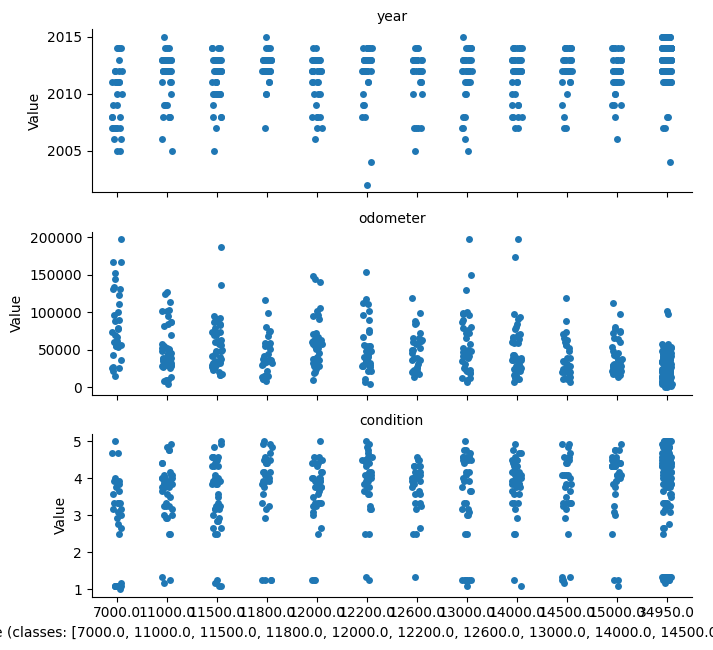

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def jitter_numeric_fast(
    df: pd.DataFrame,
    target_col: str,
    num_cols: list[str] | None = None,
    order: list | None = None,
    max_features: int = 12,
    sample: int | None = 8000,
    max_classes: int = 12,
    class_order: str = "auto",  # "auto" | "sorted" | "freq"
    dropna_target: bool = True
):
    """
    Fast jitter plot for numeric features vs a discrete target.

    x = target classes
    y = numeric feature values (one facet per feature)

    Works for:
    - integer-coded targets (e.g. 0,1,2,3 or 1..5)
    - categorical/string targets (e.g. 'Low','Med','High')
    """

    if target_col not in df.columns:
        raise KeyError(f"target_col='{target_col}' not found in df")

    d = df.copy()

    # Drop missing target (usually safest)
    if dropna_target:
        d = d.dropna(subset=[target_col])

    # Auto-detect class order if not provided
    if order is None:
        y = d[target_col]

        # If numeric-like (includes integer-coded), prefer sorted unique
        if pd.api.types.is_numeric_dtype(y):
            uniq = pd.unique(y)
            # remove NaN if present
            uniq = [v for v in uniq if pd.notna(v)]
            order = sorted(uniq)

            # If too many unique values, keep most frequent ones
            if len(order) > max_classes:
                top = y.value_counts().head(max_classes).index.tolist()
                order = sorted(top)

        else:
            # For non-numeric target, default to most frequent classes
            vc = y.astype("object").value_counts(dropna=False)
            order = vc.head(max_classes).index.tolist()

            if class_order == "sorted":
                order = sorted(order)
            elif class_order == "freq":
                order = order  # already by frequency
            else:
                # auto: if categories have natural order (pandas Categorical ordered), preserve it
                if pd.api.types.is_categorical_dtype(y) and y.cat.ordered:
                    order = list(y.cat.categories)
                    if len(order) > max_classes:
                        order = vc.head(max_classes).index.tolist()

    # Filter df to those classes
    d = d[d[target_col].isin(order)].copy()

    # Sample for speed
    if sample is not None and len(d) > sample:
        d = d.sample(sample, random_state=42)

    # Auto-detect numeric feature columns
    if num_cols is None:
        num_cols = d.select_dtypes(include="number").columns.tolist()
        num_cols = [c for c in num_cols if c != target_col]

    # Keep only existing columns
    num_cols = [c for c in num_cols if c in d.columns]

    if len(num_cols) == 0:
        raise ValueError("No numeric columns found to plot (after excluding target_col).")

    num_cols = num_cols[:max_features]

    # Long form for faceting
    long_df = d.melt(
        id_vars=[target_col],
        value_vars=num_cols,
        var_name="feature",
        value_name="value"
    ).dropna(subset=["value"])

    # Make target explicitly ordered categorical so seaborn respects the x order
    long_df[target_col] = pd.Categorical(long_df[target_col], categories=order, ordered=True)

    g = sns.catplot(
        data=long_df,
        x=target_col,
        y="value",
        row="feature",
        kind="strip",
        order=order,
        jitter=True,
        height=2.2,
        aspect=3.2,
        sharey=False
    )

    g.set_axis_labels(f"{target_col} (classes: {order})", "Value")
    g.set_titles("{row_name}")
    plt.tight_layout()
    plt.show()

    return order, num_cols


# Example:
# First, define `preprocess_data` and call it to create `df_clean`.
df_clean, _ = clean_dataset(df,
                               fix_condition=True,
                               condition_method='linear_to_1_5',
                               handle_outliers=True,
                               outlier_method='winsorize',
                               outlier_cols=('odometer','sellingprice','year'),
                               reduce_model_cardinality=True,
                               model_min_freq=int(0.01 * len(df)),
                               drop_duplicates=False
                              )

order_used, num_cols_used = jitter_numeric_fast(df_clean, target_col="sellingprice", sample=15000)
# print("Order used:", order_used)
# print("Numeric columns plotted:", num_cols_used)


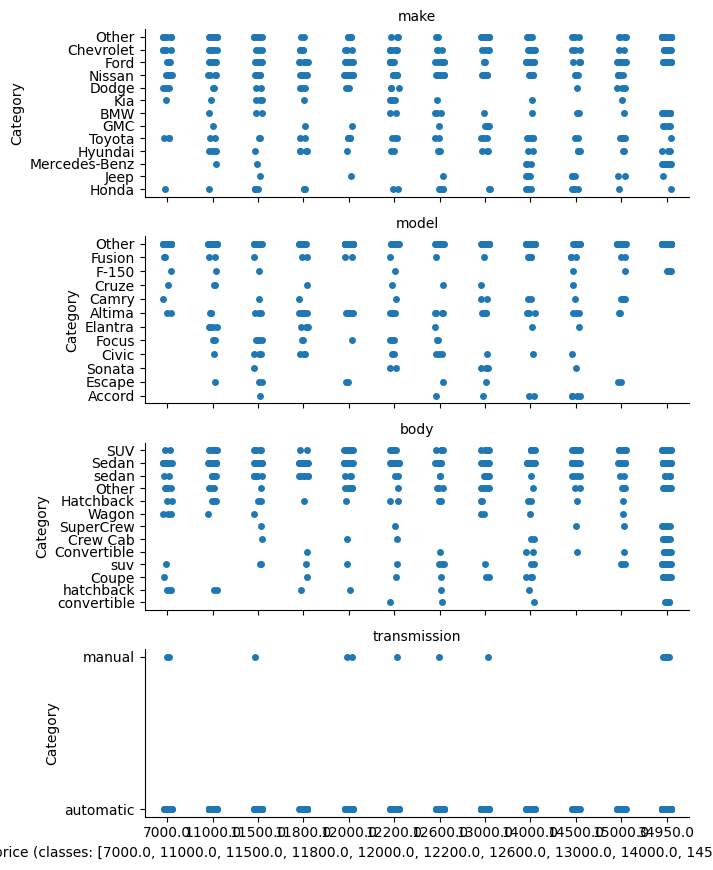

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def jitter_categorical_fast(
    df: pd.DataFrame,
    target_col: str,
    cat_cols: list[str] | None = None,
    order: list | None = None,
    max_features: int = 12,
    sample: int | None = 8000,
    max_classes: int = 12,
    class_order: str = "auto",      # "auto" | "sorted" | "freq"
    dropna_target: bool = True,
    top_k: int = 15,                # keep top categories per feature, rest -> "Other"
    dropna_feature: bool = False,   # if False, show missing as "(Missing)"
    missing_label: str = "(Missing)"
):
    """
    Fast jitter plot for categorical features vs a discrete target.

    x = target classes
    y = categorical feature levels (one facet per feature)

    Works for:
    - integer-coded targets (e.g. 0,1,2,3 or 1..5)
    - categorical/string targets (e.g. 'Low','Med','High')

    Notes:
    - For each categorical feature, rare categories are collapsed into "Other" (top_k kept).
    - Uses seaborn catplot (row facets), like jitter_numeric_fast.
    """

    if target_col not in df.columns:
        raise KeyError(f"target_col='{target_col}' not found in df")

    d = df.copy()

    # Drop missing target (usually safest)
    if dropna_target:
        d = d.dropna(subset=[target_col])

    # Auto-detect class order if not provided
    if order is None:
        y = d[target_col]

        # Numeric-like targets: prefer sorted unique
        if pd.api.types.is_numeric_dtype(y):
            uniq = pd.unique(y)
            uniq = [v for v in uniq if pd.notna(v)]
            order = sorted(uniq)

            if len(order) > max_classes:
                top = y.value_counts().head(max_classes).index.tolist()
                order = sorted(top)

        else:
            vc = y.astype("object").value_counts(dropna=False)
            order = vc.head(max_classes).index.tolist()

            if class_order == "sorted":
                order = sorted(order)
            elif class_order == "freq":
                order = order
            else:
                # auto: if pandas ordered categorical, preserve it
                if pd.api.types.is_categorical_dtype(y) and y.cat.ordered:
                    order = list(y.cat.categories)
                    if len(order) > max_classes:
                        order = vc.head(max_classes).index.tolist()

    # Filter df to those classes
    d = d[d[target_col].isin(order)].copy()

    # Sample for speed
    if sample is not None and len(d) > sample:
        d = d.sample(sample, random_state=42)

    # Auto-detect categorical feature columns
    if cat_cols is None:
        cat_cols = d.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
        cat_cols = [c for c in cat_cols if c != target_col]

    # Keep only existing columns
    cat_cols = [c for c in cat_cols if c in d.columns and c != target_col]

    if len(cat_cols) == 0:
        raise ValueError("No categorical columns found to plot (after excluding target_col).")

    cat_cols = cat_cols[:max_features]

    # Build long form with per-feature top_k collapsing
    frames = []
    for c in cat_cols:
        s = d[c]

        if dropna_feature:
            s = s.dropna()
            tmp = d.loc[s.index, [target_col]].copy()
            tmp[c] = s.astype("object")
        else:
            tmp = d[[target_col]].copy()
            tmp[c] = s.astype("object").fillna(missing_label)

        vc = tmp[c].value_counts(dropna=False)
        keep = vc.head(top_k).index
        tmp[c] = tmp[c].where(tmp[c].isin(keep), other="Other")

        tmp = tmp.rename(columns={c: "value"})
        tmp["feature"] = c
        frames.append(tmp[[target_col, "feature", "value"]])

    long_df = pd.concat(frames, ignore_index=True)

    # Make target explicitly ordered categorical so seaborn respects x order
    long_df[target_col] = pd.Categorical(long_df[target_col], categories=order, ordered=True)

    g = sns.catplot(
        data=long_df,
        x=target_col,
        y="value",
        row="feature",
        kind="strip",
        order=order,
        jitter=True,
        height=2.2,
        aspect=3.2,
        sharey=False
    )

    g.set_axis_labels(f"{target_col} (classes: {order})", "Category")
    g.set_titles("{row_name}")
    plt.tight_layout()
    plt.show()

    return order, cat_cols


# Example:
order_used, cat_cols_used = jitter_categorical_fast(df_clean, target_col="sellingprice", sample=15000, top_k=12)
# print("Order used:", order_used)
# print("Categorical columns plotted:", cat_cols_used)


##Section 4) Train-test split

 There is no question or task for you to complete in this section. You can run the codes as it is.


In [19]:
X = df_clean.drop(columns=[target_col])
y = df_clean[target_col]

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)

Train shape: (4000, 7)
Test shape : (1000, 7)


##Section 5) Encoding


##Task for question 3
###Meaningful Ranking Encoding

Perform AI-assisted ranking (Generative AI supported). Uses a Generative AI model to infer ordering based on semantic meaning or external knowledge. A structure has been provided for you below.

Complete and copy all the codes within this section to Politemall Q3.

In [21]:
numeric_features = X_train.select_dtypes(exclude=["object"]).columns.tolist()
categorical_features = X_train.select_dtypes(include=["object"]).columns.tolist()

In [22]:
# Collect categorical columns and their unique values as a single string
cat_summary = []

for col in categorical_features:
    uniques = X_train[col].unique()
    cat_summary.append(f"{col}: {list(uniques)}")

cat_summary_text = "\n".join(cat_summary)
cat_summary_text

"make: ['Cadillac', 'Ford', 'Toyota', 'Infiniti', 'Jeep', 'Ram', 'Lexus', 'Kia', 'Chevrolet', 'Chrysler', 'Nissan', 'Mercedes-Benz', 'MINI', 'Volkswagen', 'Saturn', 'Scion', 'Audi', 'Pontiac', 'BMW', 'Dodge', 'Honda', 'Lincoln', 'Suzuki', 'Hyundai', 'GMC', 'Mitsubishi', 'Buick', 'Mazda', 'Saab', 'FIAT', 'Acura', 'HUMMER', 'Subaru', 'Volvo', 'Mercury', 'Porsche', 'Jaguar', 'Land Rover', 'Ferrari', 'Bentley', 'smart', 'Isuzu']\nmodel: ['Other', 'Explorer', 'Camry', 'G Sedan', 'Cruze', 'Maxima', 'Fusion', 'Altima', 'Taurus', '3 Series', 'Escape', 'Town and Country', 'Accord', 'Corolla', 'Sonata', 'Grand Caravan', 'F-150', 'Equinox', 'Malibu', 'Silverado 1500', 'Elantra', 'Focus', 'Impala', 'Civic']\nbody: ['Sedan', 'SUV', 'sedan', 'G Sedan', 'Minivan', 'Wagon', 'Hatchback', 'SuperCab', 'convertible', 'Crew Cab', 'wagon', 'Quad Cab', 'Coupe', 'coupe', 'minivan', 'SuperCrew', 'suv', 'Van', 'Extended Cab', 'crew cab', 'hatchback', 'Double Cab', 'Regular Cab', 'Convertible', 'g sedan', 'G Cou

In [23]:
response = client.responses.create(
    model="gpt-5-mini",
    instructions="""
You are an expert data scientist with extensive knowledge of tree-based models and feature engineering. Your task is to provide a meaningful ranking for each unique category within the given categorical features. The ranking should be based on how strongly each category is typically associated with higher 'sellingprice' in the context of vehicle sales, drawing upon general automotive knowledge and common sense. If a clear ranking based on 'sellingprice' is not obvious or if the category has many unique values, suggest 'Other' or 'N/A' for that column.


For each feature, list the unique categories and assign a numerical rank (e.g., 1 for lowest expected selling price, increasing with higher expected selling price). Justify your rankings. Also, identify any columns where meaningful ranking is difficult or inappropriate, and explain why.


Provide the output in a structured dictionary format, where keys are column names and values are dictionaries mapping each category to its assigned rank.


""",
    input=f"""
Categorical features and their unique values:
{cat_summary_text}
""")


print(response.output_text)

{
  "make": {
    "Ferrari": 10,
    "Bentley": 10,
    "Porsche": 9,
    "Land Rover": 9,
    "Mercedes-Benz": 9,
    "BMW": 9,
    "Audi": 8,
    "Jaguar": 8,
    "Lexus": 8,
    "Infiniti": 7,
    "Acura": 7,
    "Cadillac": 7,
    "Lincoln": 7,
    "HUMMER": 7,
    "GMC": 7,
    "Ram": 6,
    "Toyota": 6,
    "Honda": 6,
    "MINI": 6,
    "Volvo": 6,
    "Jeep": 6,
    "Chevrolet": 5,
    "Ford": 5,
    "Nissan": 5,
    "Mazda": 5,
    "Buick": 5,
    "Volkswagen": 5,
    "Subaru": 5,
    "Chrysler": 4,
    "Dodge": 4,
    "Hyundai": 4,
    "Kia": 4,
    "Mitsubishi": 3,
    "Suzuki": 3,
    "Scion": 3,
    "Saab": 3,
    "FIAT": 2,
    "smart": 2,
    "Pontiac": 2,
    "Saturn": 2,
    "Mercury": 2,
    "Isuzu": 2
  },

  "model": {
    "Other": "N/A",
    "F-150": 9,
    "Silverado 1500": 8,
    "3 Series": 8,
    "Explorer": 6,
    "Camry": 6,
    "Accord": 6,
    "Maxima": 6,
    "Altima": 5,
    "Corolla": 5,
    "Civic": 5,
    "Taurus": 4,
    "Malibu": 4,
    "Impala": 4,


In [33]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin


class PriceEncoder(BaseEstimator, TransformerMixin):
    """
    Encode categorical laptop attributes using externally provided
    price mappings (e.g. Brand, Model, CPU, GPU).

    - Safe for Pipeline and GridSearchCV
    - DataFrame-in, DataFrame-out
    - Numeric-only output
    """

    def __init__(self, column_maps, fallback="median"):
        """
        Parameters
        ----------
        column_maps : dict
            {column_name: {category: numeric_price}}
        fallback : 'median' or numeric
            Value used for unseen categories
        """
        self.column_maps = column_maps
        self.fallback = fallback

    def fit(self, X, y=None):
        # compute fallback values per column
        self.fallbacks_ = {}

        for col, mapping in self.column_maps.items():
            values = [v for v in mapping.values() if v != 'N/A'] # Exclude 'N/A' from median calculation

            if self.fallback == "median":
                self.fallbacks_[col] = float(np.median(values)) if values else 0.0 # Handle empty values case
            else:
                self.fallbacks_[col] = float(self.fallback)

        return self

    def transform(self, X):
        X = X.copy()

        for col, mapping in self.column_maps.items():
            if col not in X.columns:
                continue

            fb = self.fallbacks_[col]

            # Create a new mapping where 'N/A' strings are converted to np.nan
            cleaned_mapping = {k: (np.nan if v == 'N/A' else v) for k, v in mapping.items()}

            # Apply the cleaned mapping
            X[col] = X[col].map(cleaned_mapping)

            # Fill any remaining NaNs (including those from 'N/A' in mapping) with the fallback
            X[col] = X[col].fillna(fb)

            # Ensure the column is numeric type
            X[col] = pd.to_numeric(X[col], errors='coerce')

        return X

In [25]:
#mapping

In [37]:
import json
from sklearn.compose import ColumnTransformer

# Extract only the JSON part from the response_text
# Find the first '{' and the last '}'
start_idx = response.output_text.find('{')
end_idx = response.output_text.rfind('}')

if start_idx != -1 and end_idx != -1:
    json_string = response.output_text[start_idx : end_idx + 1]
    raw_price_maps = json.loads(json_string)
else:
    # Handle cases where JSON might not be found or is malformed
    print("Error: Could not extract valid JSON from response.")
    raw_price_maps = {}

# Filter raw_price_maps to include only actual categorical features
price_maps = {col: raw_price_maps[col] for col in categorical_features if col in raw_price_maps}

preprocessor = ColumnTransformer([
        ("cat", PriceEncoder(column_maps=price_maps), categorical_features) # Use categorical_features
    ],remainder='passthrough')

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

price_maps = {

}


preprocessor = ColumnTransformer([
        ("cat", PriceEncoder(column_maps=price_maps), categorical_features)
    ],remainder='passthrough')

##Section 6) Modelling

Use the following code if you were unable to create a manual encoder. If you were able to, you do not run the following code. For the models, you do not need to edit or tune the model.

```

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Identify columns by dtype
num_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_features = X_train.select_dtypes(exclude=[np.number]).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
    ],
    remainder="drop"
)
```

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
# -------------------------------------------
# 1. Create pipelines for both models
# -------------------------------------------

pipe_rf = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])

pipe_xgb = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", XGBRegressor(
        random_state=42))
])

# -------------------------------------------
# 2. Define parameter grids
# Keep them small for speed and simplicity
# -------------------------------------------

param_grid_rf = {
  "regressor__n_estimators": [250],
  'regressor__max_depth':[5],
  'regressor__criterion':['squared_error']
}

param_grid_xgb = {
    "regressor__n_estimators": [250],
  'regressor__max_depth':[6],
  'regressor__eval_metric':['rmse']
}

# -------------------------------------------
# 3. Create GridSearchCV objects
# -------------------------------------------

gs_rf = GridSearchCV(
    estimator=pipe_rf,
    param_grid=param_grid_rf,
    cv=cv,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    verbose=3
)

gs_xgb = GridSearchCV(
    estimator=pipe_xgb,
    param_grid=param_grid_xgb,
    cv=cv,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    verbose=3
)

# -------------------------------------------
# 4. Fit both models
# (Students can run one at a time if needed)
# -------------------------------------------e

gs_rf.fit(X_train, y_train)
print("Random Forest grid search complete.")

gs_xgb.fit(X_train, y_train)
print("XGBoost grid search complete.")

# -------------------------------------------
# 5. Evaluate on test set
# -------------------------------------------

from sklearn.metrics import mean_absolute_error

rf_pred = gs_rf.best_estimator_.predict(X_test)
xgb_pred = gs_xgb.best_estimator_.predict(X_test)

print("\nMAE (Random Forest):", mean_absolute_error(y_test, rf_pred))
print("Best RF Params:", gs_rf.best_params_)

print("\nMAE (XGBoost):", mean_absolute_error(y_test, xgb_pred))
print("Best XGB Params:", gs_xgb.best_params_)


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Random Forest grid search complete.
Fitting 10 folds for each of 1 candidates, totalling 10 fits
XGBoost grid search complete.

MAE (Random Forest): 2942.5303578449425
Best RF Params: {'regressor__criterion': 'squared_error', 'regressor__max_depth': 5, 'regressor__n_estimators': 250}

MAE (XGBoost): 2896.829466308594
Best XGB Params: {'regressor__eval_metric': 'rmse', 'regressor__max_depth': 6, 'regressor__n_estimators': 250}


##Section 7) Quick diagnostic plot (sorted true vs predicted)

This plot helps you check whether the model follows the overall price pattern.
The same approach can also be applied consistently when reviewing other models during model selection.

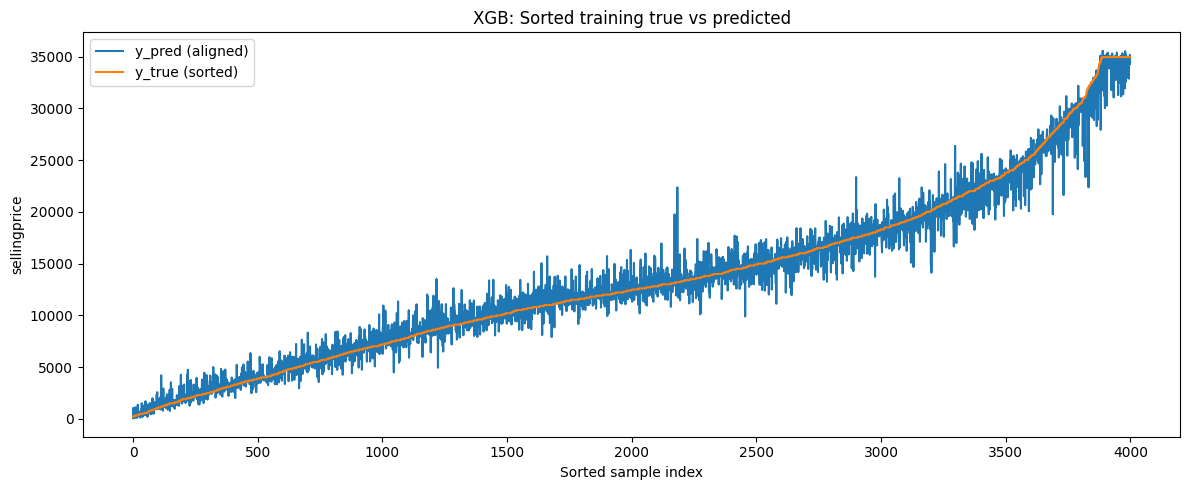

In [39]:
# Helper: plot y_true sorted, with y_pred aligned to same order
xgb_tpred = gs_xgb.best_estimator_.predict(X_train)
def plot_sorted_true_vs_pred(y_true, y_pred, title, xlabel="Sorted sample index"):
    y_true = np.asarray(y_true).ravel()
    y_pred = np.asarray(y_pred).ravel()

    order = np.argsort(y_true)
    y_true_sorted = y_true[order]

    plt.figure(figsize=(12, 5))
    plt.plot(y_pred[order], label="y_pred (aligned)")
    plt.plot(y_true_sorted, label="y_true (sorted)")

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("sellingprice")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_sorted_true_vs_pred(y_train, xgb_tpred, "XGB: Sorted training true vs predicted")

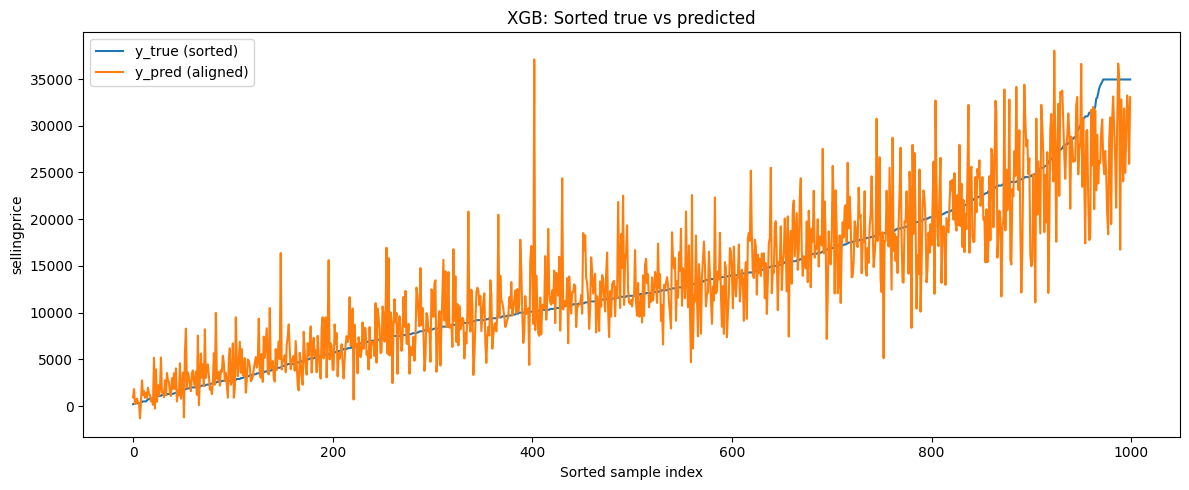

In [40]:
# Helper: plot y_true sorted, with y_pred aligned to same order
def plot_sorted_true_vs_pred(y_true, y_pred, title, xlabel="Sorted sample index"):
    y_true = np.asarray(y_true).ravel()
    y_pred = np.asarray(y_pred).ravel()

    order = np.argsort(y_true)
    y_true_sorted = y_true[order]

    plt.figure(figsize=(12, 5))
    plt.plot(y_true_sorted, label="y_true (sorted)")
    plt.plot(y_pred[order], label="y_pred (aligned)")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("sellingprice")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_sorted_true_vs_pred(y_test, xgb_pred, "XGB: Sorted true vs predicted")

##Section 8) Model selection


##Task for question 4
### Model selection
See Politemall Q4, for more details. Save this as ipynb file and attach it to the same question.